# Visualize convolution layers of a network

This script helps us visualize the convolution layers of a network. We can see the kernels and the feature maps of the chosen convolution layers. It might help us get some intuition about what the network is doing.

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec

from pathlib import Path
from collections import Counter

from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from custom_layers import CTCLayer

### Choose a model and an image on which to visualize the feature maps

In [2]:
model_dir = Path("./models/")
model_name = 'model-c64-c128-c256-d1024-d256-d64-bs16-ep50-spacedblured.h5'

img_dir = Path("./data/")
img_name = 'arial.png'

model_path = model_dir / model_name
img_path = img_dir / img_name

# Get the model
model = keras.models.load_model(model_path, custom_objects={'CTCLayer': CTCLayer})

In [3]:
# Name of the convolution layer to visualize
conv_layer_name = 'Conv1'

# retrieve weights from the second hidden layer
filters, biases =  model.get_layer(name=conv_layer_name).get_weights()

In [4]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters_norm = (filters - f_min) / (f_max - f_min)

# Get convolutions on an image
# load the image with the required shape
img = Image.open(img_path).convert('L')
img = img.resize((200, 70))

# redefine model to output right after the first hidden layer
model = prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name=conv_layer_name).output
)  

# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(np.array(img).T, axis=0)

# get feature map for first hidden layer
feature_maps = model.predict(img)
feature_maps = np.squeeze(feature_maps)
feature_maps.shape

f_min, f_max = feature_maps.min(), feature_maps.max()
feature_maps_norm = (feature_maps - f_min) / (f_max - f_min)

1/1 [==============================] - 12s 12s/step


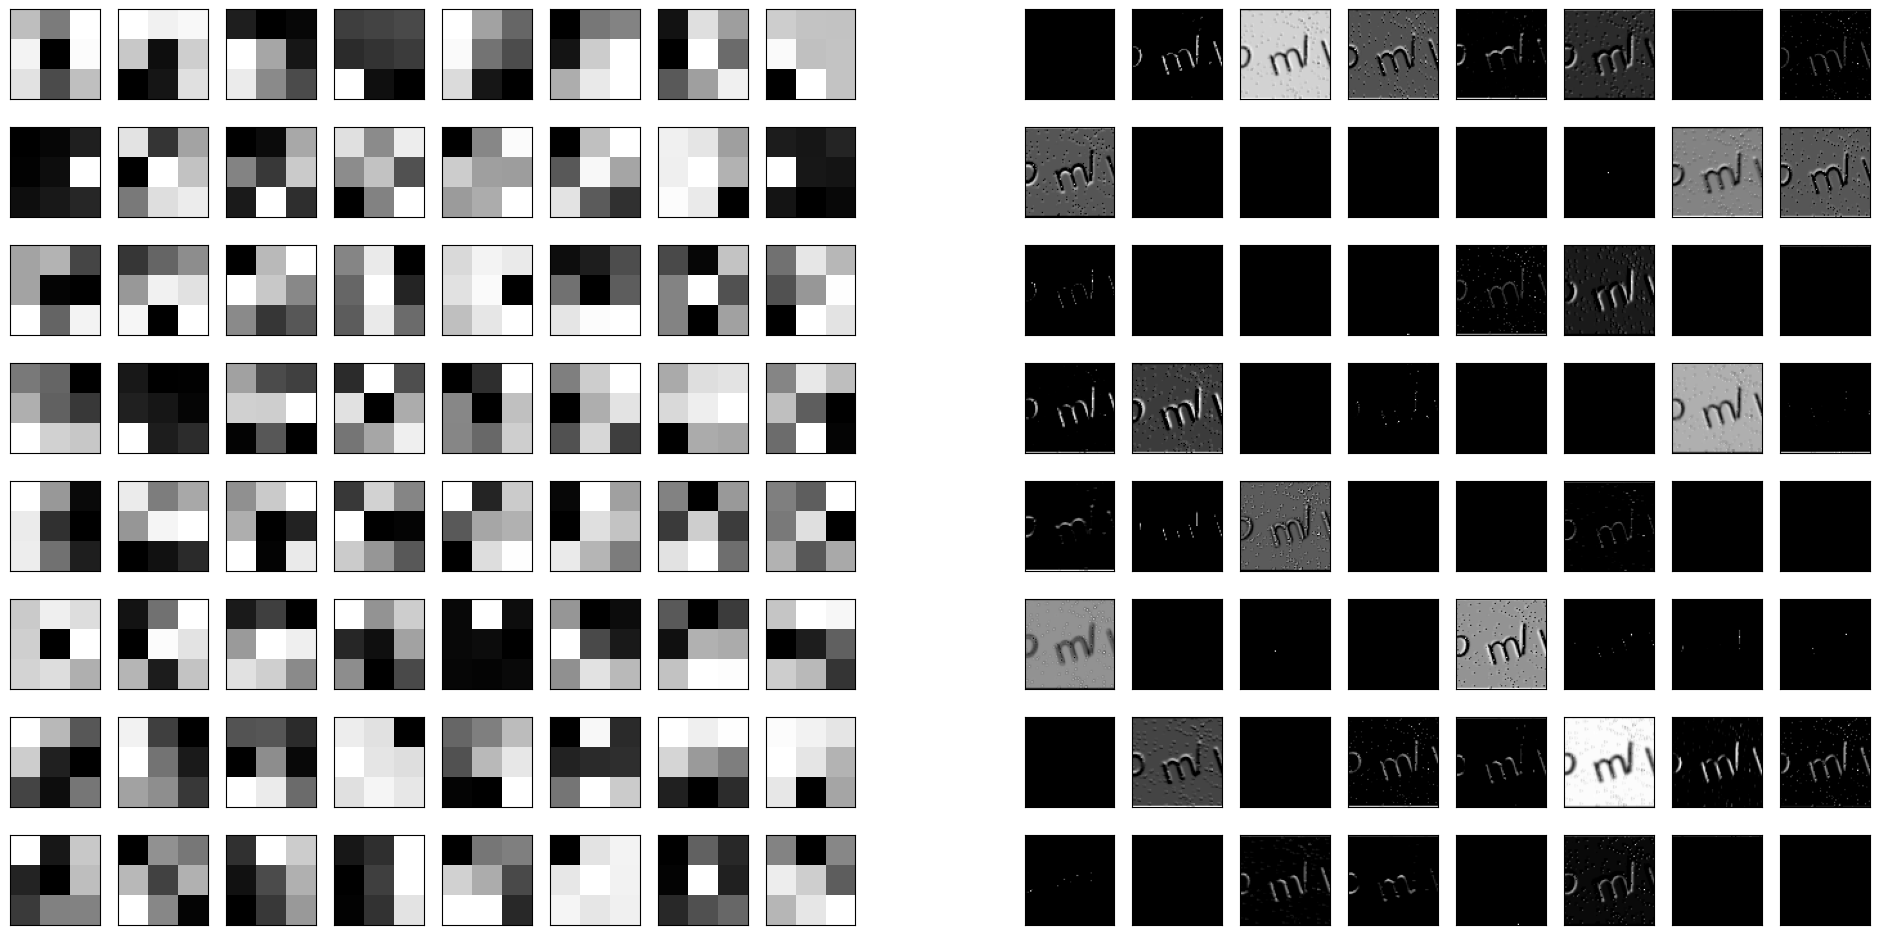

In [9]:
n_filters, ix = 64, 0

fig = plt.figure(figsize=(24, 12))

gs0 = gridspec.GridSpec(1, 2)
gs00 = gridspec.GridSpecFromSubplotSpec(8, 8, subplot_spec=gs0[0])
gs01 = gridspec.GridSpecFromSubplotSpec(8, 8, subplot_spec=gs0[1])

for i in range(8):
    for j in range(8):
        ax00 = fig.add_subplot(gs00[i, j])
        ax00.imshow(filters_norm[:, :, ix, j + (i * 8)], cmap='gray')

        ax00.set_xticks([])
        ax00.set_yticks([])

        ax01 = fig.add_subplot(gs01[i, j])
        ax01.imshow(feature_maps[30:100, :, j + (i * 8)].T, cmap='gray')
        ax01.set_xticks([])
        ax01.set_yticks([])

It looks like it is very difficult to interpret this result.